**DATA VISUALIZATION OF BASE MODELS RESULTS**

In [1]:
import pandas as pd
import numpy as np

f1score_rf = pd.read_csv("weighted_f1_rf.csv", sep='\,', engine='python')
f1score_gnb = pd.read_csv("weighted_f1_gnb.csv", sep='\,', engine='python')
f1score_svm = pd.read_csv("weighted_f1_svm.csv", sep='\,', engine='python')
f1score_lr = pd.read_csv("weighted_f1_lr.csv", sep='\,', engine='python')
f1score_nn = pd.read_csv("weighted_f1_nn.csv", sep='\,', engine='python')
f1score_gb = pd.read_csv("weighted_f1_gb.csv", sep='\,', engine='python')

In [2]:
print(f"Gradient Boosting Mean Weighted F1-Score:       {np.mean(f1score_gb['score'])}")
print(f"Neural Networks Mean Weighted F1-Score:         {np.mean(f1score_nn['score'])}")
print(f"Random Forest Mean Weighted F1-Score:           {np.mean(f1score_rf['score'])}")
print(f"Gaussian Naive Bayes Mean Weighted F1-Score:    {np.mean(f1score_gnb['score'])}")
print(f"Logistic Regression Mean Weighted F1-Score:     {np.mean(f1score_lr['score'])}")
print(f"Support Vector Machines Mean Weighted F1-Score: {np.mean(f1score_svm['score'])}")

Gradient Boosting Mean Weighted F1-Score:       0.6389097766681082
Neural Networks Mean Weighted F1-Score:         0.5808108262467909
Random Forest Mean Weighted F1-Score:           0.5739477552752065
Gaussian Naive Bayes Mean Weighted F1-Score:    0.48313170571971586
Logistic Regression Mean Weighted F1-Score:     0.3039240303283691
Support Vector Machines Mean Weighted F1-Score: 0.29115318422954245


In [3]:
sorted_base_scores = [f1score_svm['score'],
                      f1score_lr['score'],
                      f1score_gnb['score'],
                      f1score_rf['score'],
                      f1score_nn['score'],
                      f1score_gb['score']
                     ]

sorted_base_names = ["SVM",
                     "LR",
                     "GNB",
                     "RF",
                     "NN",
                     "GB"
                    ]

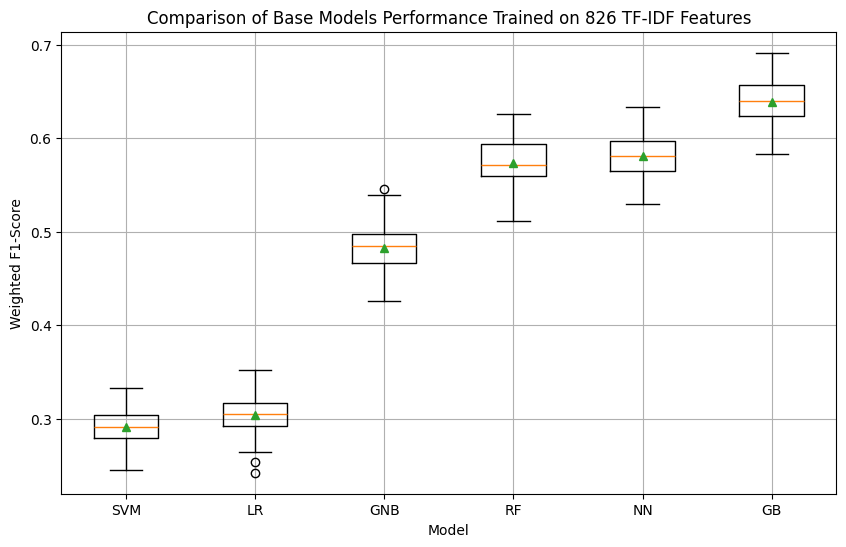

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 6))
plt.boxplot(sorted_base_scores, tick_labels = sorted_base_names, showmeans = True)
plt.title('Comparison of Base Models Performance Trained on 826 TF-IDF Features')
plt.ylabel('Weighted F1-Score')
plt.xlabel('Model')
plt.grid(True)
plt.show()

#fig.savefig('comparisonBaseModels.png')

**PLOT BASE MODELS WITH TIME**

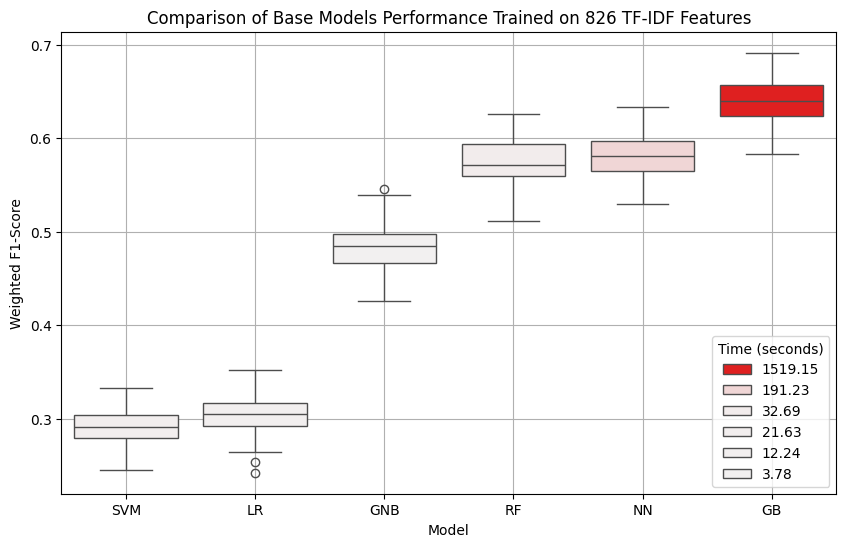

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "Model": np.repeat(sorted_base_names, 102),
    "Score": np.concatenate(sorted_base_scores),
    "Time": np.concatenate([np.repeat(21.63, 102),
                          np.repeat(12.24, 102),
                          np.repeat(3.78, 102),
                          np.repeat(32.69, 102),
                          np.repeat(191.23, 102),
                          np.repeat(1519.15, 102)]
                         )
}

df = pd.DataFrame(data)

# Plotting with Seaborn



fig = plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="Model",
    y="Score",
    hue="Time",
    palette="light:#F00",
    hue_norm=(0, df["Time"].max()), # df["Time"].min(), df["Time"].max()
    dodge=False,
    #showmeans = True
)

# Add title and labels
plt.title("Comparison of Base Models Performance Trained on 826 TF-IDF Features")
plt.ylabel("Weighted F1-Score")
plt.xlabel("Model")

# Add colorbar
# sm = plt.cm.ScalarMappable(cmap= sns.color_palette("light:#F00", as_cmap=True), norm=plt.Normalize(vmin=0, vmax=df["Time"].max()))
# sm.set_array([])
# cbar = plt.colorbar(sm, ax=plt.gca(), orientation="vertical")
# cbar.set_label("Time (seconds)")

#plt.legend([],[], frameon=False)

plt.legend(reverse = True, title = "Time (seconds)", loc = "lower right")

plt.grid(True)
plt.show()

#fig.savefig('comparisonBaseModelsTime.png')

**Distribution of F1-Score of The Best Base Model**

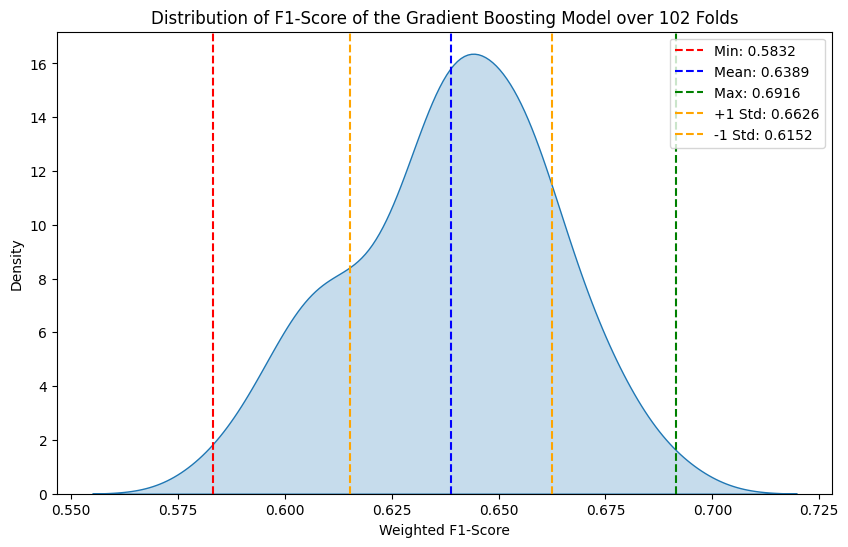

In [7]:
# Calculate min, mean, max, and standard deviation
min_val = f1score_gb['score'].min()
mean_val = f1score_gb['score'].mean()
max_val = f1score_gb['score'].max()
std_val = f1score_gb['score'].std()

# Create the density plot
fig = plt.figure(figsize=(10, 6))
sns.kdeplot(f1score_gb['score'], fill=True)

# Add vertical lines for min, mean, max, and std
plt.axvline(x=min_val, color='r', linestyle='--', label=f'Min: {min_val:.4f}')
plt.axvline(x=mean_val, color='b', linestyle='--', label=f'Mean: {mean_val:.4f}')
plt.axvline(x=max_val, color='g', linestyle='--', label=f'Max: {max_val:.4f}')
plt.axvline(x=mean_val + std_val, color='orange', linestyle='--', label=f'+1 Std: {mean_val + std_val:.4f}')
plt.axvline(x=mean_val - std_val, color='orange', linestyle='--', label=f'-1 Std: {mean_val - std_val:.4f}')


plt.title('Distribution of F1-Score of the Gradient Boosting Model over 102 Folds')
plt.xlabel('Weighted F1-Score')
plt.ylabel('Density')
plt.legend()
plt.show()

#fig.savefig('bestBaseModel.png')